In [42]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [43]:
#Importando os dados
media_classificacao_time = pd.read_csv('media_final.csv')

In [44]:
media_classificacao_time.head()

,ano,classificacao_time2,idade,altura_jogador,peso_jogador,qtd_jogadores,media_jogadores,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,168,33.600000,63.095238
1,2003,2,42.301370,1.812329,76.712329,73,24.333333,54.810496
2,2004,2,41.602410,1.820952,76.904762,84,28.000000,47.945205
3,2005,0,39.031250,1.827250,76.925000,160,32.000000,65.662651
4,2005,2,39.295775,1.824366,77.070423,71,23.666667,56.176471


# Modelagem

In [45]:
#Dividindo os dados em treino e teste
X = media_classificacao_time.drop(columns=['ano','classificacao_time2','qtd_jogadores'])
y = media_classificacao_time['classificacao_time2']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)



In [46]:
print("QTD LINHAS:", len(X_treino))
X_treino.head()

QTD LINHAS: 20


,idade,altura_jogador,peso_jogador,media_jogadores,pct_estrangeiro
13,34.510870,1.832717,77.456522,30.666667,60.638298
15,32.707602,1.827778,76.198830,34.200000,65.402844
11,35.877049,1.822479,75.851240,42.333333,45.161290
17,31.957983,1.824774,76.178470,29.750000,54.347826
1,42.301370,1.812329,76.712329,24.333333,54.810496


In [47]:
print("QTD LINHAS:", len(y_treino))
y_treino.head()

QTD LINHAS: 20


13    2
15    0
11    2
17    1
1     2
Name: classificacao_time2, dtype: int64

In [48]:
print("QTD LINHAS:", len(X_teste))
X_teste.head()

QTD LINHAS: 9


,idade,altura_jogador,peso_jogador,media_jogadores,pct_estrangeiro
27,25.537975,1.829627,75.852713,31.600000,62.576687
16,33.132743,1.820088,75.477876,37.666667,58.139535
12,34.022599,1.819659,75.880682,35.400000,66.257669
22,30.306818,1.839318,78.395349,29.333333,58.474576
8,36.282609,1.831848,75.619565,30.666667,43.661972


In [49]:
#Normalizando os dados
scaler = MinMaxScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)


In [50]:
#Treinando o modelo de regressão logística
#Treinando o modelo
modelo_LR = LogisticRegression(random_state=0)
modelo_LR.fit(X_treino, y_treino)
#Avaliando o modelo
modelo_LR.score(X_teste, y_teste)*100

44.44444444444444

In [51]:
#Treinando o modelo
modelo_DT = DecisionTreeClassifier(random_state=0)
modelo_DT.fit(X_treino, y_treino)

#Avaliando o modelo
modelo_DT.score(X_teste, y_teste)*100


66.66666666666666

In [52]:
#Treinando o modelo
modelo_RF = RandomForestClassifier()
modelo_RF.fit(X_treino, y_treino)

#Avaliando o modelo
modelo_RF.score(X_teste, y_teste)

0.7777777777777778

In [53]:
#Treinando o modelo
modelo_GB = GradientBoostingClassifier()
modelo_GB.fit(X_treino, y_treino)

#Avaliando o modelo
modelo_GB.score(X_teste, y_teste)


0.6666666666666666

Avaliando as variaveis mais importantes para o modelo


### Feature Importance

In [54]:
#Avliando a importância das variáveis com a arvore de decisão
for i in zip(X.columns, modelo_DT.feature_importances_):
 print(i)

('idade', 0.14639639639639643)
('altura_jogador', 0.0)
('peso_jogador', 0.2837837837837839)
('media_jogadores', 0.0)
('pct_estrangeiro', 0.5698198198198197)


In [55]:
#Avaliando a importância das variáveis com o random forest
for i in zip(X.columns, modelo_RF.feature_importances_):
 print(i)

('idade', 0.1845992234403687)
('altura_jogador', 0.1125895221449672)
('peso_jogador', 0.13114275747356807)
('media_jogadores', 0.2404565231130774)
('pct_estrangeiro', 0.3312119738280187)


In [56]:
#Avaliando a importância das variáveis com o gradient boosting
for i in zip(X.columns, modelo_GB.feature_importances_):
 print(i)

('idade', 0.14502822473040566)
('altura_jogador', 0.06200936279391901)
('peso_jogador', 0.23773320936557954)
('media_jogadores', 0.05285170107422273)
('pct_estrangeiro', 0.5023775020358731)


In [57]:
#Avaliando a importância das variáveis com a regressão logística
for i in zip(X.columns, modelo_LR.coef_[0]):
 print(i)

('idade', -0.029749934367553528)
('altura_jogador', -0.18045886656817925)
('peso_jogador', -0.16390721920665935)
('media_jogadores', 0.5412721668378137)
('pct_estrangeiro', 1.1247827610831287)


### Prever os modelos
#### Avaliar os modelos com outras métricas 

In [62]:
#Importanto as bibliotecas para avaliação dos modelos
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay


In [63]:
#Prever o modelo de regressão logística
y_pred_LR = modelo_LR.predict(X_teste) 
y_pred_LR


array([2, 2, 0, 2, 2, 2, 2, 2, 2], dtype=int64)

In [64]:
#Avaliar o modelo de regressão logística com Classification Report 
print(classification_report(y_teste, y_pred_LR))

#print(classification_report(y_teste, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.00      0.00      0.00         1
           2       0.38      1.00      0.55         3

    accuracy                           0.44         9
   macro avg       0.46      0.40      0.29         9
weighted avg       0.68      0.44      0.37         9



c:\Users\Elvis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _, _, f, _ = precision_recall_fscore_support(
c:\Users\Elvis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _, _, f, _ = precision_recall_fscore_support(
c:\Users\Elvis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _, _, f, _ = precision_recall_fs

print(confusion_matrix(y_teste, y_pred))
print(accuracy_score(y_teste, y_pred))
cm = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_LR.classes_)
disp.plot()

In [67]:
#Avaliar o modelo de regressão logística com Matriz de Confusão
confusion_matrix(y_teste, y_pred_LR)


array([[1, 0, 4],
       [0, 0, 1],
       [0, 0, 3]], dtype=int64)

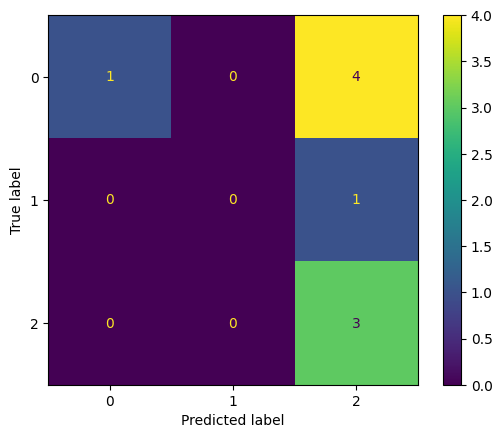

In [70]:
#Plot da matriz de confusão
cm = confusion_matrix(y_teste, y_pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_LR.classes_)
disp.plot()

In [ ]:
import joblib as jb

In [75]:


modelo_LR=y_pred_LR

description='Modelo de Regressão Logistica. Foram utilizados os seguintes dados:' + "','".join(X.columns)
date='02/06/2024'
version='0.1'
name_modelo='media_final_RL'
metrics= 'acc: 0.77 e f1score:0.54462'

dic_save_model = dict({
'model': modelo,
'mdetadata':{
	'description': description,
	'author': 'AEE',
	'date': date,
	'source_code_version':version,
	'metrics':metrics
}
})
dic_save_model


{'model': LogisticRegression(),
 'mdetadata': {'description': "Modelo de Regressão Logistica. Foram utilizados os seguintes dados:idade','altura_jogador','peso_jogador','media_jogadores','pct_estrangeiro",
  'author': 'AEE',
  'date': '02/06/2024',
  'source_code_version': '0.1',
  'metrics': 'acc: 0.77 e f1score:0.54462'}}

Avaliando a ÁRVORE DE DECISÃO

In [76]:
#Prever o modelo de arvore de decisão
y_pred_DT = modelo_DT.predict(X_teste)
y_pred_DT


array([0, 2, 0, 1, 2, 2, 0, 0, 2], dtype=int64)

In [77]:
#Avaliar o modelo de regressão logística com Classification Report 
print(classification_report(y_teste, y_pred_DT))


              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.00      0.00      0.00         1
           2       0.50      0.67      0.57         3

    accuracy                           0.67         9
   macro avg       0.50      0.49      0.49         9
weighted avg       0.72      0.67      0.68         9

